# Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

# Understanding of problem statement

In [4]:
#Importing necessary libraries for classification & regression.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

#Libraries for classification model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, classification_report

#Libraries for Regression model
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import LabelEncoder

import pickle


import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
#Finding the shape of dataset

df.shape

(18249, 14)

In [7]:
#Removal of Unnamed columns from dataset
df.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
df.shape

(18249, 13)

In [9]:
#Finding the null vales
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [10]:
#Finding the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [11]:
#Finding the duplicated values

df.duplicated().sum()

0

In [12]:
#desscribing the data set
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# EDA

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

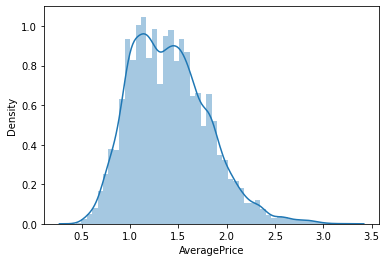

In [13]:
#Plotting dist plot to know more about average price
sns.distplot(df["AveragePrice"])

In [14]:
#Seperating date, month, Year columns

from datetime import datetime
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

# monday = 0
df['day of week'] = df['Date'].dt.dayofweek
dates = ['year', 'month', 'day', 'day of week']
df[dates]

,year,month,day,day of week
0,2015,12,27,6
1,2015,12,20,6
2,2015,12,13,6
3,2015,12,6,6
4,2015,11,29,6
...,...,...,...,...
18244,2018,2,4,6
18245,2018,1,28,6
18246,2018,1,21,6
18247,2018,1,14,6


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  month         18249 non-null  int64         
 14  day           18249 non-null  int64         
 15  day of week   18249 non-null  int64 

In [16]:
#Dropping the date column
df.drop("Date", axis=1, inplace=True)

In [17]:
#Sepearting the numerical columns from the dataset

num=df.select_dtypes(include=[np.number])


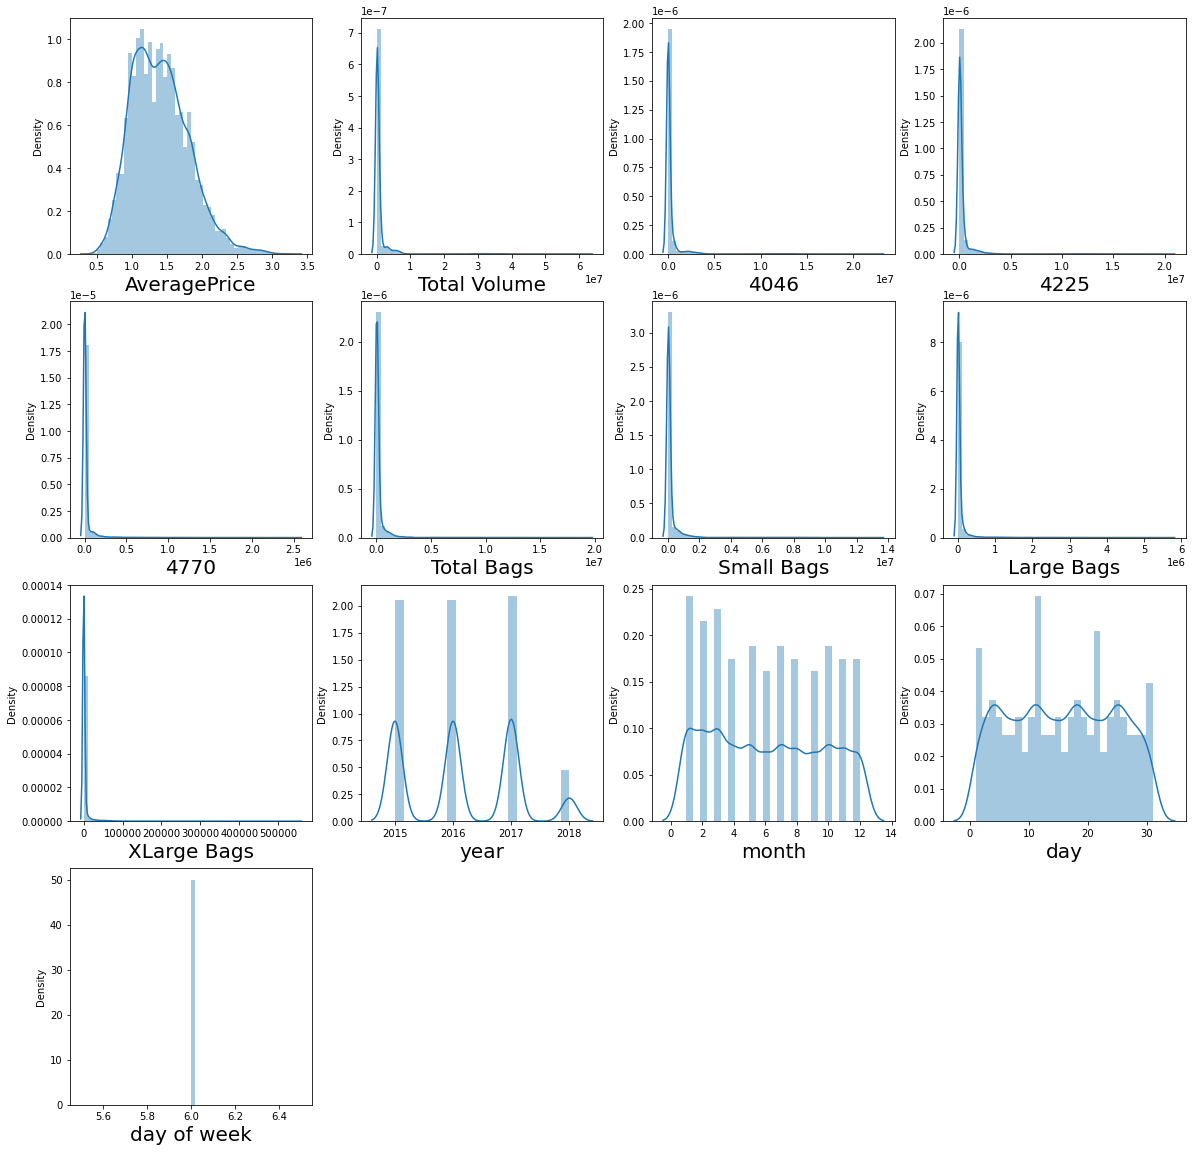

In [18]:
#Lets see how data is destributed for every column
plt.figure(figsize=(20,20))
plotnumber=1

for column in num:
    if plotnumber<=13:
        ax=plt.subplot(4,4, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+= 1

plt.show()


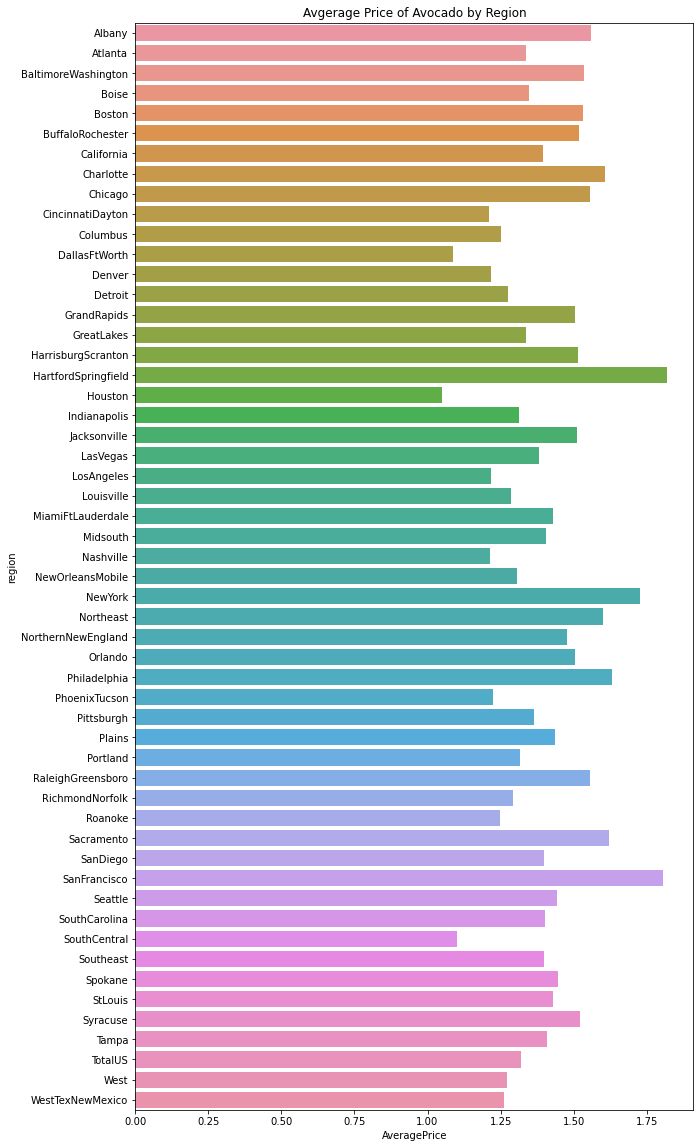

In [19]:
#Plotting the graph of Average Price Vs Region

plt.figure(figsize=(10,20))

plt.title("Avgerage Price of Avocado by Region")

sns.barplot(x="AveragePrice",y="region",data=df,ci=None)

plt.show()

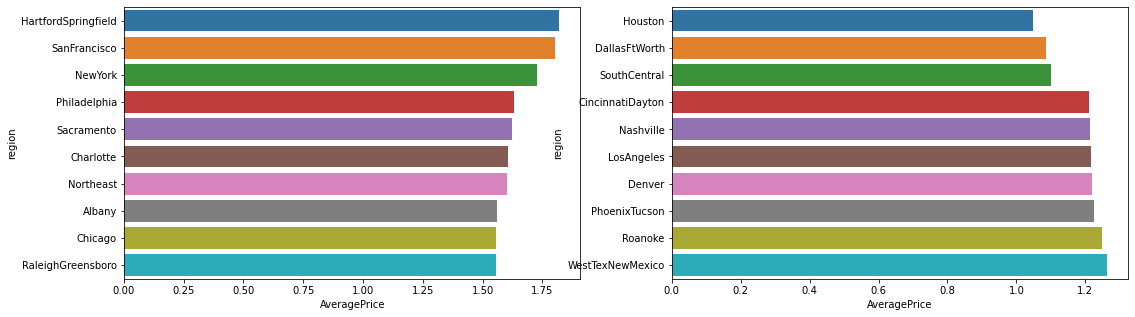

States with the the higher Average Price are ['HartfordSpringfield', 'SanFrancisco', 'NewYork', 'Philadelphia', 'Sacramento'] 
States with the lower Average Price are ['Houston', 'DallasFtWorth', 'SouthCentral', 'CincinnatiDayton', 'Nashville'] 


In [20]:
#Plotting the graph of Staes with higher avg price & lower avg price.

fig, ax = plt.subplots(1, 2, figsize=(18,5))

dataStates = df[df['region'] !='TotalUS']

regionV = dataStates.groupby('region')['AveragePrice'].sum()

most = regionV.sort_values(ascending = False).iloc[:10]
least = regionV.sort_values().iloc[:10]

sns.barplot(x='AveragePrice', y='region', data = dataStates, order=most.index, ci=None, ax=ax[0])
sns.barplot(x='AveragePrice', y='region', data = dataStates, order=least.index, ci=None, ax=ax[1])
plt.show()

most = pd.DataFrame(most).reset_index()
least = pd.DataFrame(least).reset_index()

print('States with the the higher Average Price are {} '.format(list(most.iloc[:5,0])))
print('States with the lower Average Price are {} '.format(list(least.iloc[:5,0])))

<AxesSubplot:xlabel='type', ylabel='count'>

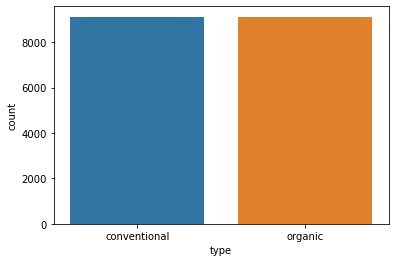

In [21]:
#Visualising the type

sns.countplot(df["type"])

Verifying that which type of fruit average price is higher

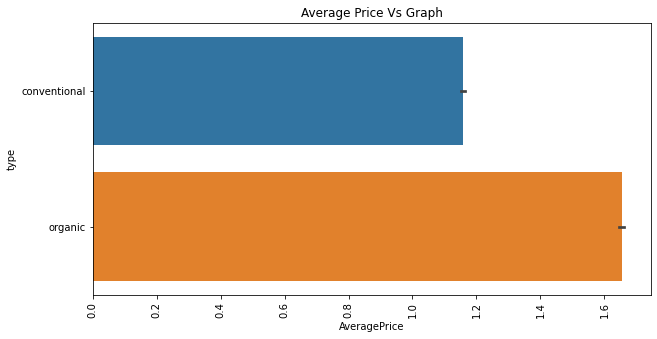

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(df["AveragePrice"],y= df["type"] )
plt.title("Average Price Vs Graph")
plt.xticks(rotation=90)
plt.show()

In [23]:
#Making the new dataset exclusing the TotalUS volume which impact on graph. Hence we are not going to consider this rows.
dataStates = df[df['region'] !='TotalUS']


-Graph of Total volume Vs Region

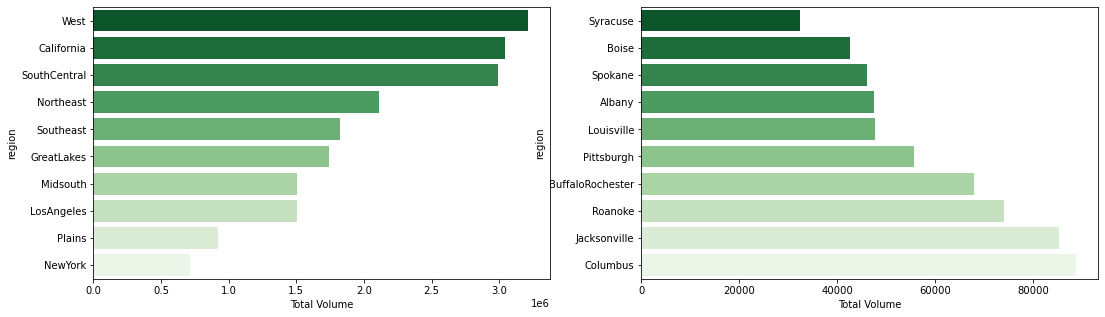

States with the the biggest demand are ['West', 'California', 'SouthCentral', 'Northeast', 'Southeast'] 
States with the least demand are ['Syracuse', 'Boise', 'Spokane', 'Albany', 'Louisville'] 


In [24]:
#Visualsing the higher demand & lower demand states

fig, ax = plt.subplots(1, 2, figsize=(18,5))

dataStates = df[df['region'] !='TotalUS']

regionV = dataStates.groupby('region')['Total Volume'].sum()

most = regionV.sort_values(ascending = False).iloc[:10]
least = regionV.sort_values().iloc[:10]

sns.barplot(x='Total Volume', y='region', data = dataStates, order=most.index, ci=None,palette='Greens_r', ax=ax[0])
sns.barplot(x='Total Volume', y='region', data = dataStates, order=least.index, ci=None, palette='Greens_r', ax=ax[1])
plt.show()

most = pd.DataFrame(most).reset_index()
least = pd.DataFrame(least).reset_index()

print('States with the the biggest demand are {} '.format(list(most.iloc[:5,0])))
print('States with the least demand are {} '.format(list(least.iloc[:5,0])))

Text(0.5, 1.0, 'Average Price Per Year')

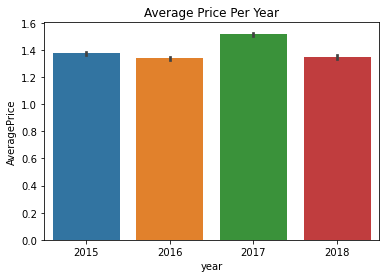

In [25]:
#Checking the Average Price Per Year

sns.barplot(x=df["year"], y=df["AveragePrice"])
plt.title("Average Price Per Year")

Text(0.5, 1.0, 'Total Volume Per Year')

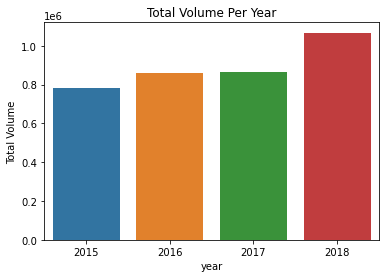

In [26]:
#Also checking the total Volume Per Year


sns.barplot(x=df["year"], y=df["Total Volume"], ci=None)
plt.title("Total Volume Per Year")

Text(0.5, 1.0, 'Total Volume Per Average Price')

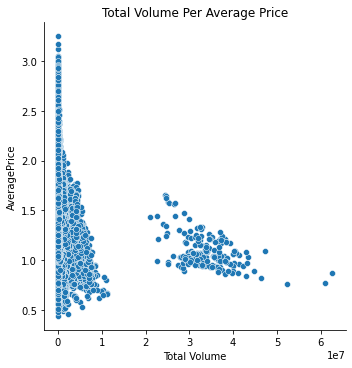

In [27]:
#Plotting the graph of AveragePrice Vs Total Volume

sns.relplot(y=df["AveragePrice"], x=df["Total Volume"], ci=None)
plt.title("Total Volume Per Average Price")

In [28]:
#From above It is observed that average price increases with decrease in volume.

# Dates & Seasonality check

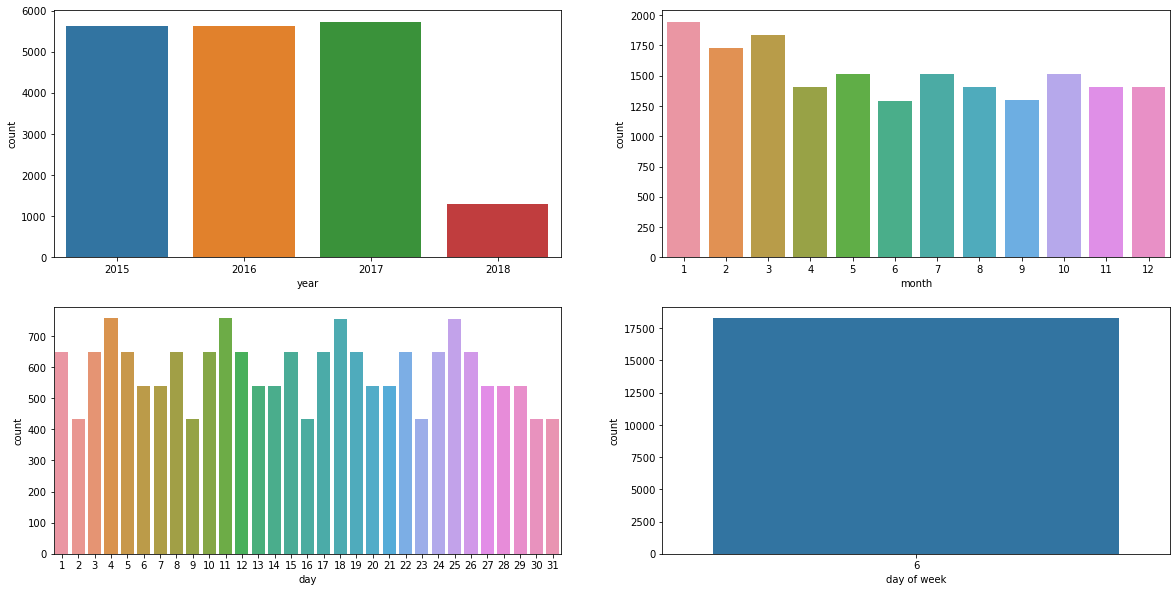

In [29]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

sns.countplot('year', data=df, ax=ax[0,0])
sns.countplot('month', data=df, ax=ax[0,1])
sns.countplot('day', data=df, ax=ax[1,0])
sns.countplot('day of week', data=df, ax=ax[1,1])

plt.show()

# First we have to convert object datatype using label Encoder technique

In [30]:
#Initiasing the label Encoder
lab_enc=LabelEncoder()

In [31]:
#Type & region are object datatyep hence needs to encode 

df1=lab_enc.fit_transform(df["type"])
df2=lab_enc.fit_transform(df["region"])


In [32]:
#Fetching the data into main dataset
df["type"]=df1
df["region"]=df2


In [33]:
#Getting dataset after converting object datset to numeric
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day,day of week
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27,6
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20,6
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13,6
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29,6


In [34]:
#We have sucessfully encoded the dataset

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int32  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int32  
 12  month         18249 non-null  int64  
 13  day           18249 non-null  int64  
 14  day of week   18249 non-null  int64  
dtypes: float64(9), int32(2), int64(4)
memory usage: 1.9 MB


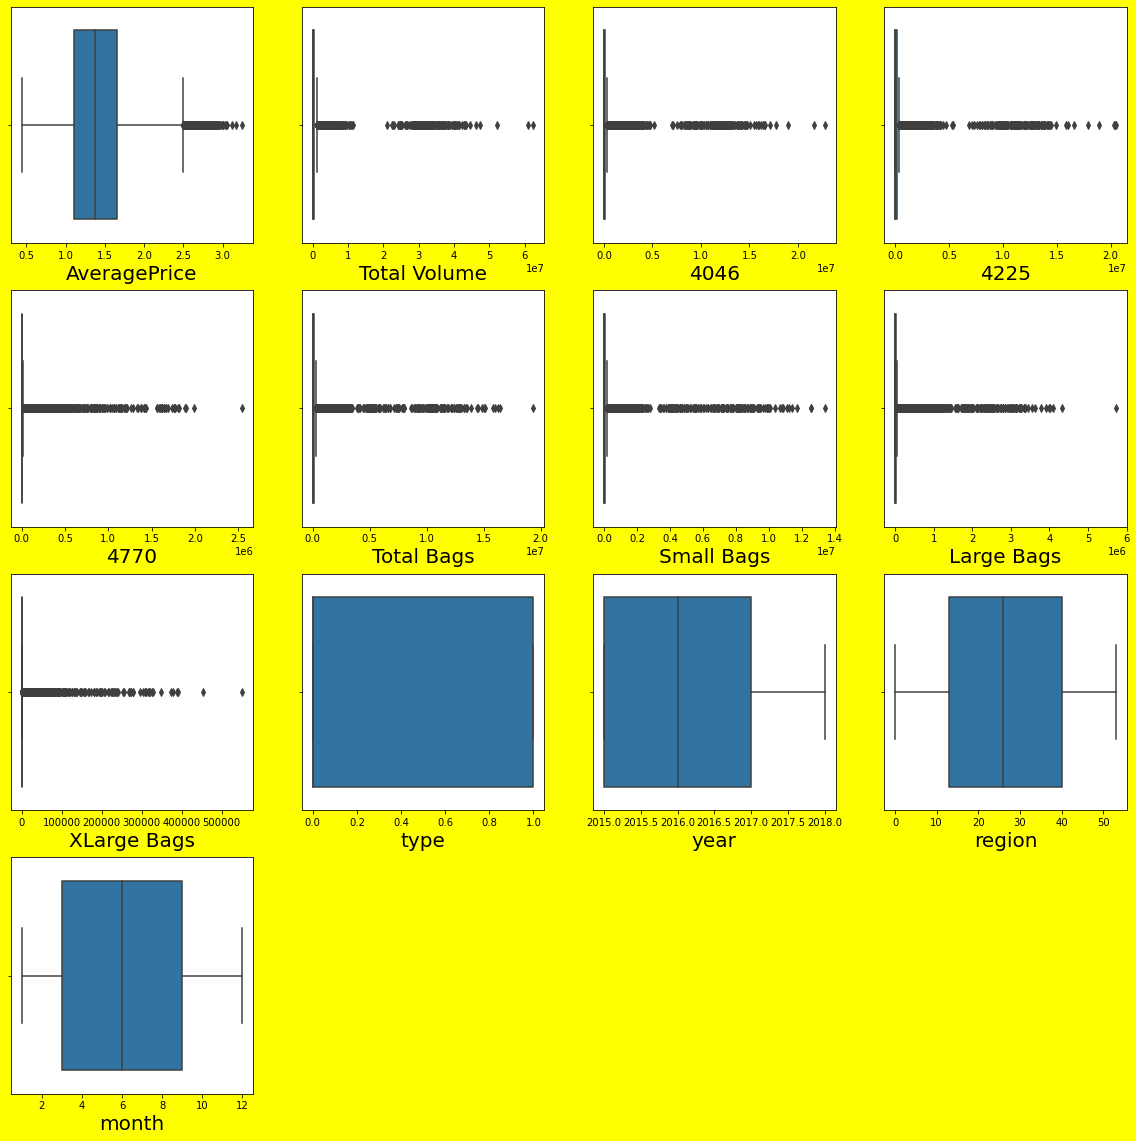

In [36]:
#Lets see how data is destributed for every column
plt.figure(figsize=(20,20), facecolor="yellow")
plotnumber=1

for column in df:
    if plotnumber<=13:
        ax=plt.subplot(4,4, plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+= 1

plt.show()

In [37]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr = q3 - q1
((df<(q1 -(1.5 * iqr)))|(df>(q3 +(1.5 * iqr)))).sum()

AveragePrice     209
Total Volume    2297
4046            2518
4225            2519
4770            2918
Total Bags      2533
Small Bags      2407
Large Bags      2707
XLarge Bags     4014
type               0
year               0
region             0
month              0
day                0
day of week        0
dtype: int64

In [38]:
df.shape

(18249, 15)

In [39]:
#As per my point of view each & every data is important for mdel prediction hence i decied not to remove any outliers.

<AxesSubplot:>

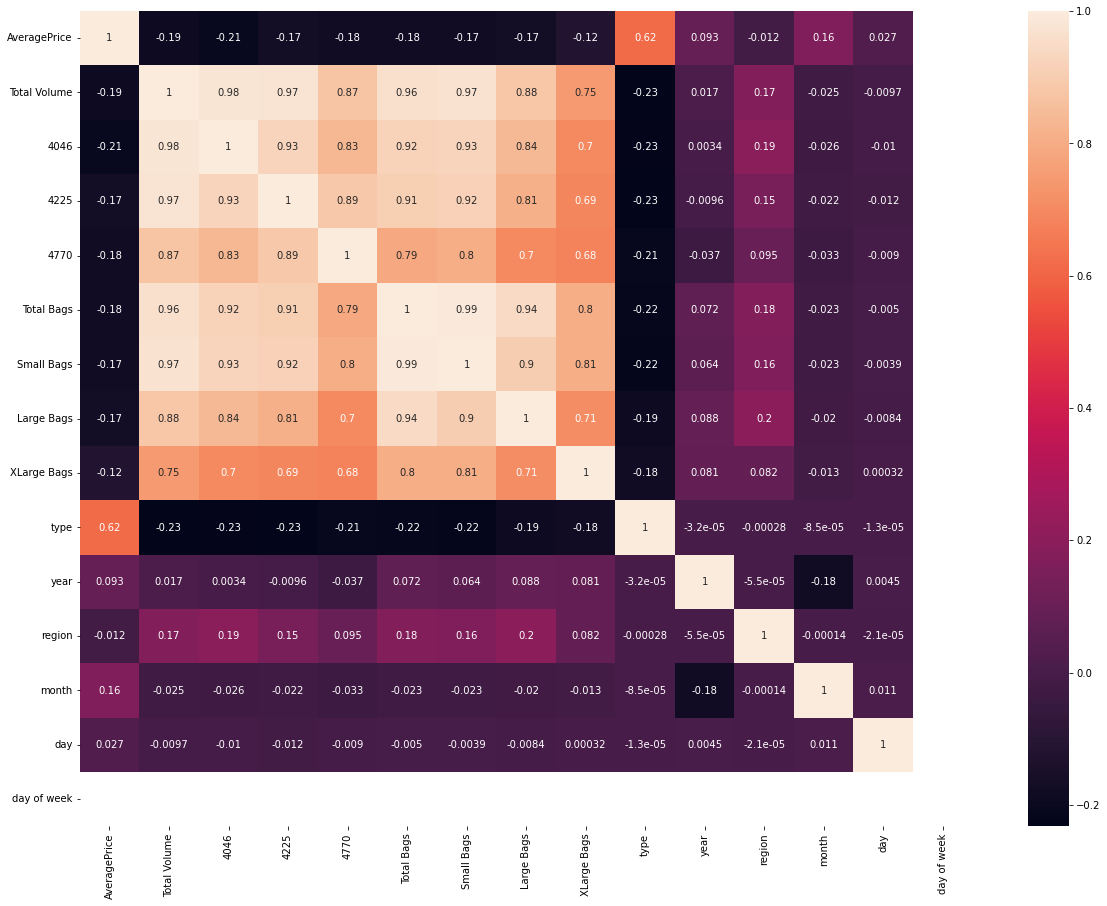

In [40]:
#Finding the correlation
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

# Total Volume vs Small, Large and XLarge

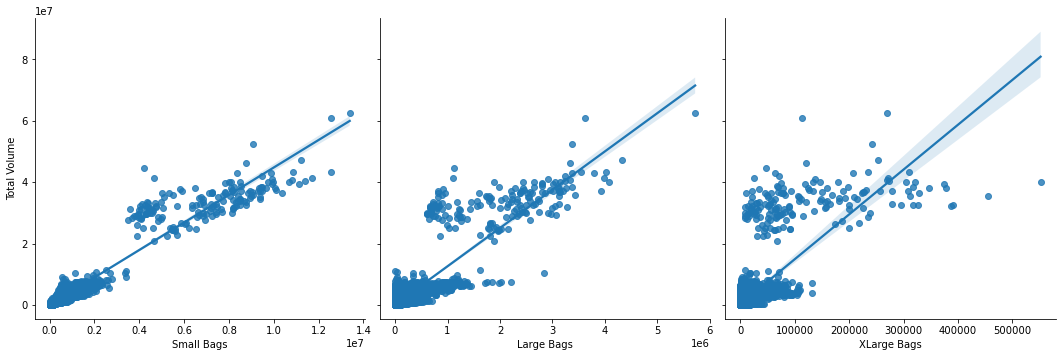

In [41]:
sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Volume', size=5, aspect=1, kind='reg')

In [42]:
#Small Bags Vs Total Volume is linearly correlated, followed by remaining bags. 


# Total Volume Vs Total Bags, 4770, 4225,4046

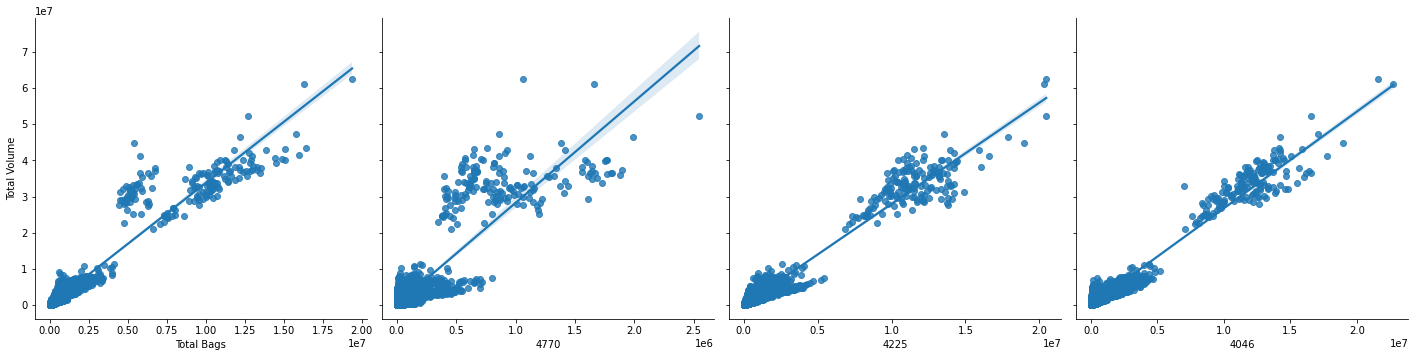

In [43]:
sns.pairplot(df, x_vars=['Total Bags', '4770', '4225', '4046'], y_vars='Total Volume', size=5, aspect=1, kind='reg')

In [44]:
#Total volume Vs Total Bags, 4770, 4225, 4046 are linearly correlated with each other.

# Total Bags vs Small Bags, Large Bags and XLarge Bags

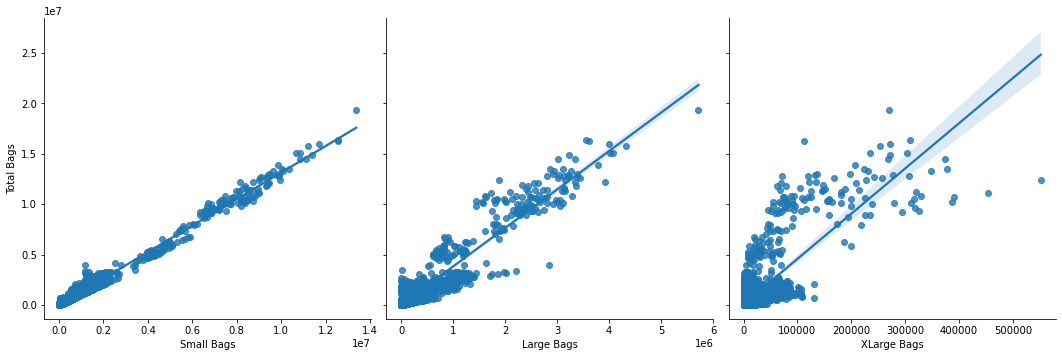

In [45]:
sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Bags', size=5, aspect=1, kind='reg')

In [46]:
#Small bags Vs Total bags are highly correlated with each other. Some scatteredness observed in large bags & xlarge bags.

# Total Bags Vs 4770, 4225,4046

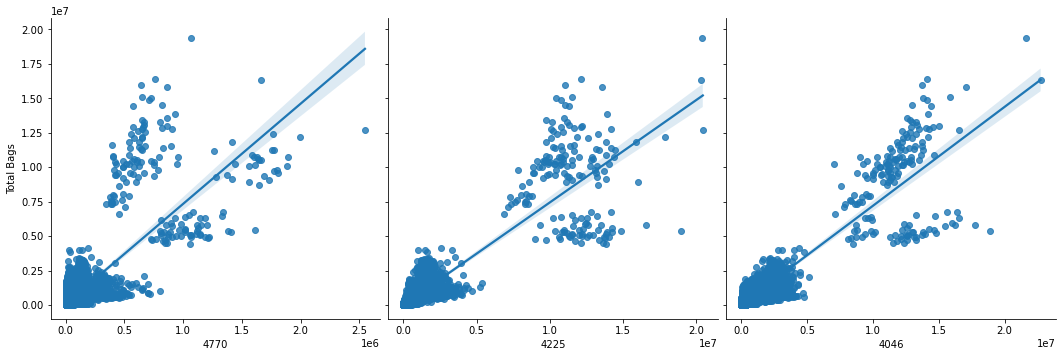

In [47]:
sns.pairplot(df, x_vars=['4770', '4225', '4046'], y_vars='Total Bags', size=5, aspect=1, kind='reg')

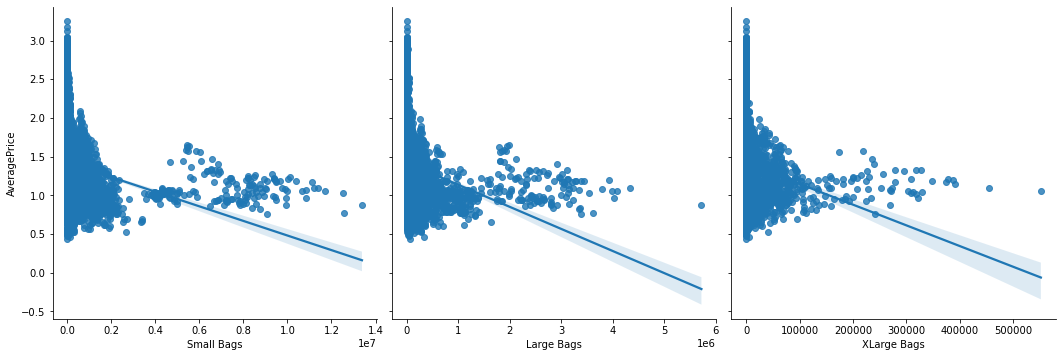

In [48]:
sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='AveragePrice', size=5, aspect=1, kind='reg')

# Prediction of Average Price of Avocado By regression model

Scaling of dataset using Standard Scalar

In [49]:
x=df.drop(columns=["AveragePrice"], axis=1)
y=df["AveragePrice"]

In [50]:
#Scaling of dataset
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [51]:
#Finding Variance inflation factor to check multicolinearity

vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["features"]=x.columns

vif


,vif,features
0,4.926465e+09,Total Volume
1,6.609602e+08,4046
2,5.988844e+08,4225
3,4.770265e+06,4770
4,2.370316e+14,Total Bags
5,1.364727e+14,Small Bags
6,1.450435e+13,Large Bags
7,7.622368e+10,XLarge Bags
8,1.061752e+00,type
9,1.084444e+00,year


In [52]:
#4046, 4225, xlarge bags rae having higher correlationship.

In [53]:
#Finding the shape of X
x_scaled.shape

(18249, 14)

# Train Test Split

In [54]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y, test_size=0.25, random_state=1)

# Model Initialisation

# Using Linear Regression

In [55]:
lr = LinearRegression()
lr.fit(x_train,y_train)

print("R2 of Linear Regresson:", lr.score(x_train,y_train) )
print("----- Prediction Accuracy-----")
print('MAE: ',metrics.mean_absolute_error(y_test, lr.predict(x_test)))
print('MSE: ',metrics.mean_squared_error(y_test, lr.predict(x_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, lr.predict(x_test))))

R2 of Linear Regresson: 0.4370269853357722
----- Prediction Accuracy-----
MAE:  0.2321904217121343
MSE:  0.08990137433395713
RMSE: 0.29983557883272816


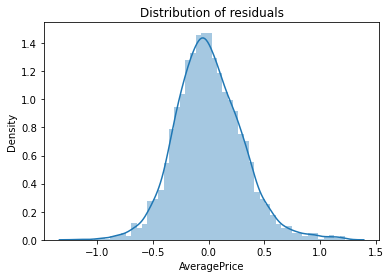

In [56]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_test - lr.predict(x_test))
plt.title('Distribution of residuals')
plt.show()

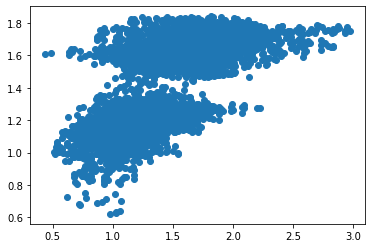

In [57]:
plt.scatter(y_test,lr.predict(x_test));

In [58]:
#Checking training score

lr.score(x_train, y_train)

0.4370269853357722

In [59]:
#Checking testing score

lr.score(x_test, y_test)

0.4451683890460003

In [60]:

y_pred=lr.predict(x_test)
y_pred

array([1.67022285, 1.23476351, 1.14799396, ..., 1.58818593, 1.5276238 ,
       1.55048417])

In [61]:
pred_train=lr.predict(x_train)
pred_train

array([1.28144196, 1.68047937, 1.67167773, ..., 0.78330299, 1.62146354,
       1.14175075])

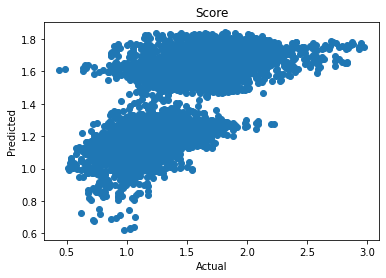

In [62]:
#Plotting the graph of Acutal score Vs Predicted score

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Score")
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [64]:
y_pred= lr.predict(x_test)
y_pred

array([1.67022285, 1.23476351, 1.14799396, ..., 1.58818593, 1.5276238 ,
       1.55048417])

In [65]:
#Mean square error
mean_absolute_error(y_test, y_pred)

0.2321904217121343

In [66]:
#MSE
mean_absolute_error(y_test, y_pred)

0.2321904217121343

In [67]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

0.29983557883272816

In [68]:
r2_score(y_test, y_pred)

0.4451683890460003

Prediction of model

In [69]:
conclusion=pd.DataFrame([lr.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])


In [70]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,4553,4554,4555,4556,4557,4558,4559,4560,4561,4562
Predicted,1.670223,1.234764,1.147994,1.696306,1.550262,1.228513,1.637907,1.235524,1.160892,1.6878,...,1.03537,1.788401,1.695494,1.549779,1.144109,1.303998,1.729934,1.588186,1.527624,1.550484
Original,2.110000,0.980000,1.170000,1.780000,1.610000,1.110000,1.990000,1.410000,1.190000,1.0200,...,1.00000,1.810000,2.020000,1.570000,1.120000,1.330000,1.480000,1.450000,1.870000,1.590000


# Using Random Forest

In [71]:
rf= RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [72]:
#Checking training score

rf.score(x_train, y_train)

0.9840052820430613

In [73]:
#Checking testing score

rf.score(x_test, y_test)

0.8922424659890764

In [74]:

y_pred=rf.predict(x_test)
y_pred

array([1.9708, 1.0216, 1.2255, ..., 1.4755, 1.7856, 1.5799])

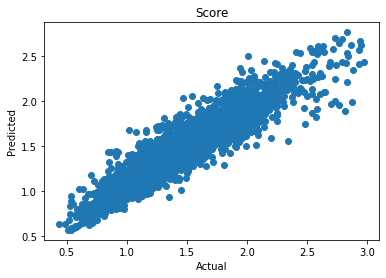

In [75]:
#Plotting the graph of Acutal score Vs Predicted score

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Score")
plt.show()

In [76]:
y_pred= rf.predict(x_test)
y_pred

array([1.9708, 1.0216, 1.2255, ..., 1.4755, 1.7856, 1.5799])

In [77]:
#Mean square error
mean_absolute_error(y_test, y_pred)

0.09196855139162831

In [78]:
#MSE
mean_absolute_error(y_test, y_pred)

0.09196855139162831

In [79]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

0.1321375923144196

In [80]:
r2_score(y_test, y_pred)

0.8922424659890764

In [81]:
#cross validation is to check whether the model is overfitting

from sklearn.model_selection import KFold, cross_val_score

Cross Validation

In [82]:
cv_score=cross_val_score(rf, x_scaled, y, cv=5)
cv_score

array([-0.23849738,  0.47685005,  0.59199631,  0.22310494,  0.00286591])

In [83]:
cv_score.mean()

0.21126396692453236

In [84]:
#Saving the model in local file system 


In [85]:
conclusion=pd.DataFrame([rf.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])


In [86]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,4553,4554,4555,4556,4557,4558,4559,4560,4561,4562
Predicted,1.9708,1.0216,1.2255,1.5405,1.8109,1.197,1.8953,1.3968,1.1076,0.9985,...,1.0194,1.9624,2.262,1.5495,1.1857,1.3532,1.6913,1.4755,1.7856,1.5799
Original,2.1100,0.9800,1.1700,1.7800,1.6100,1.110,1.9900,1.4100,1.1900,1.0200,...,1.0000,1.8100,2.020,1.5700,1.1200,1.3300,1.4800,1.4500,1.8700,1.5900


# using knn regressor

In [87]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled,y, test_size=0.25, random_state=1)

In [88]:
knn= KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [89]:
#Checking training score

knn.score(x_train, y_train)

0.6820226780027696

In [90]:
#Checking testing score

knn.score(x_test, y_test)

0.5354759964381579

In [91]:

y_pred=knn.predict(x_test)
y_pred

array([1.754, 1.114, 1.27 , ..., 1.412, 1.606, 1.602])

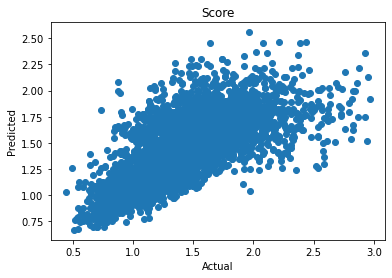

In [92]:
#Plotting the graph of Acutal score Vs Predicted score

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Score")
plt.show()

In [93]:
#Mean square error
mean_absolute_error(y_test, y_pred)

0.1995380232303309

In [94]:
#MSE
mean_absolute_error(y_test, y_pred)

0.1995380232303309

In [95]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

0.27435106306989726

In [96]:
r2_score(y_test, y_pred)

0.5354759964381579

In [97]:
#cross validation is to check whether the model is overfitting

from sklearn.model_selection import KFold, cross_val_score

In [98]:
cv_score=cross_val_score(knn, x_scaled, y, cv=4)
cv_score

array([-1.11241816, -0.05173305, -0.44601947, -0.17430147])

In [99]:
cv_mean=cv_score.mean()
cv_mean

-0.44611803735071986

In [100]:
#Saving the model in local file system 


In [101]:
conclusion=pd.DataFrame([knn.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])


In [102]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,4553,4554,4555,4556,4557,4558,4559,4560,4561,4562
Predicted,1.754,1.114,1.27,1.532,1.47,1.062,1.948,1.384,1.064,1.724,...,1.058,1.962,1.544,1.71,0.958,1.334,2.302,1.412,1.606,1.602
Original,2.110,0.980,1.17,1.780,1.61,1.110,1.990,1.410,1.190,1.020,...,1.000,1.810,2.020,1.57,1.120,1.330,1.480,1.450,1.870,1.590


# Ada Boost Regressor

In [103]:
from sklearn.ensemble import AdaBoostRegressor

In [104]:
ada=AdaBoostRegressor()
ada.fit(x_train, y_train)

AdaBoostRegressor()

In [105]:
#Model Prediction on train data
y_pred=ada.predict(x_train)


In [106]:
accuracy=metrics.r2_score(y_train, y_pred)
print("R Square Score" , accuracy)

R Square Score 0.5710934470711776


In [107]:
#Model Prediction on test data
y_pred=ada.predict(x_test)


In [108]:
accuracy=metrics.r2_score(y_test, y_pred)
print("R Square Score" , accuracy)

R Square Score 0.5710736680142781


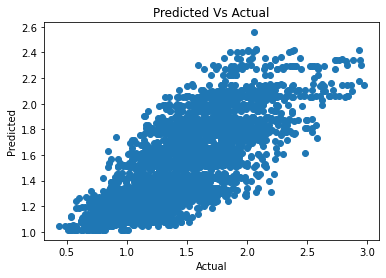

In [109]:
#Plotting the graph of Acutal score Vs Predicted score

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted Vs Actual")
plt.show()

In [110]:
#Mean square error
mean_absolute_error(y_test, y_pred)

0.21488282898328862

In [111]:
#MSE
mean_absolute_error(y_test, y_pred)

0.21488282898328862

In [112]:
#RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

0.2636294487033343

In [113]:
r2_score(y_test, y_pred)

0.5710736680142781

In [114]:
#cross validation is to check whether the model is overfitting

from sklearn.model_selection import KFold, cross_val_score

In [115]:
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y, test_size=0.25, random_state=20)

In [116]:
cv_score=cross_val_score(ada, x_scaled, y, cv=4)
cv_score

array([-0.69566486,  0.08421122, -0.37595124,  0.1619743 ])

In [117]:
cv_mean=cv_score.mean()
cv_mean

-0.206357644010881

In [118]:
#Saving the model in local file system 


In [119]:
conclusion=pd.DataFrame([ada.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,4553,4554,4555,4556,4557,4558,4559,4560,4561,4562
Predicted,1.560218,1.605616,1.314677,1.19967,1.136493,1.529226,1.339365,1.33026,1.239848,1.314677,...,1.893823,1.28107,2.293887,1.793383,1.267745,2.051599,1.237002,1.303817,1.073749,1.619903
Original,1.640000,1.360000,1.340000,1.23000,0.810000,1.140000,1.370000,1.81000,0.940000,0.910000,...,1.270000,1.04000,2.700000,1.540000,1.290000,2.120000,1.470000,1.020000,0.780000,1.810000


# We have successfully trained the regression model & predict the Average price of Avacoda 



# Now we are going to predict the region by using classification method



In [120]:
X=df.drop(columns=["region"], axis=1)
y1=df["region"]

# Scaling using standard scalar

In [121]:
scalar=StandardScaler()
X_scalar=scalar.fit_transform(X)

In [122]:
x_train,x_test, y_train,y_test= train_test_split(X_scalar, y1, test_size=0.25)

In [123]:
#Write the function & call it is as many as times to check the accuracy score of different model
def metric_score (clf, x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("=============Train Result==============")
        
        print(f"Accuracy score:{accuracy_score(y_train, y_pred)*100:.2f}%")
        
    elif train== False:
        pred=clf.predict(x_test)
        
        print("=============Test Result==============")
        
        print(f"Accuracy score:{accuracy_score(y_test, pred)*100:.2f}%")
        
        print("\n \n Test Classification report \n ", classification_report(y_test,pred,digits=2)) #For model accuracy
        
        

# Model Initialisation with Decision Tree Classifier

In [124]:
clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [125]:
metric_score(clf, x_train, x_test, y_train, y_test, train=True)

metric_score(clf, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:100.00%
=============Test Result==============
Accuracy score:80.12%

 
 Test Classification report 
                precision    recall  f1-score   support

           0       0.84      0.79      0.81        77
           1       0.77      0.74      0.76        86
           2       0.95      0.89      0.92       109
           3       0.75      0.85      0.80        67
           4       0.82      0.87      0.85        63
           5       0.67      0.77      0.72        81
           6       0.97      0.94      0.95        88
           7       0.80      0.80      0.80        96
           8       0.92      0.95      0.94       102
           9       0.79      0.83      0.81        69
          10       0.71      0.74      0.73        77
          11       0.88      0.77      0.82        86
          12       0.92      0.89      0.90        89
          13       0.77      0.80      0.79        71
          14       0.81      0.

In [126]:
#We are tunning the parameter , passing different values for oth parameters
param_grid={
    "criterion":["gini","entropy"],
    "max_depth":range(10,15),
    "min_samples_leaf":range(2,6),
    "min_samples_split":range(3,8),
    "max_leaf_nodes":range(5,10)
}

In [123]:
grid_search=GridSearchCV(estimator=clf, param_grid=param_grid,cv=5,n_jobs=-1)

In [124]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [125]:
#Finding best parameters
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 4}


In [128]:
#Initiate Decision tree with new parameters & train
clf=DecisionTreeClassifier(criterion= 'gini', max_depth= 10, max_leaf_nodes= 30, min_samples_leaf= 15, min_samples_split=20)

#Train the model
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30, min_samples_leaf=15,
                       min_samples_split=20)

In [129]:
# Call the function & pass the dataset to check train test score
metric_score(clf, x_train, x_test, y_train, y_test, train=True)

metric_score(clf, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:24.21%
=============Test Result==============
Accuracy score:21.70%

 
 Test Classification report 
                precision    recall  f1-score   support

           0       0.20      0.37      0.26        82
           1       0.20      0.42      0.27        77
           2       0.00      0.00      0.00        90
           3       0.00      0.00      0.00        98
           4       0.00      0.00      0.00        86
           5       0.00      0.00      0.00        73
           6       0.84      0.31      0.45        88
           7       0.00      0.00      0.00        90
           8       0.80      0.44      0.57        88
           9       0.00      0.00      0.00        90
          10       0.04      0.47      0.08        79
          11       0.30      0.39      0.34        85
          12       0.00      0.00      0.00        91
          13       0.00      0.00      0.00        97
          14       0.00      0.0

In [ ]:
conclusion=pd.DataFrame([clf.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

# Random Forest

In [130]:
random_clf= RandomForestClassifier()

random_clf.fit(x_train, y_train)

RandomForestClassifier()

In [131]:
metric_score(random_clf, x_train, x_test, y_train, y_test, train=True)

metric_score(random_clf, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:100.00%
=============Test Result==============
Accuracy score:91.28%

 
 Test Classification report 
                precision    recall  f1-score   support

           0       0.90      0.94      0.92        82
           1       0.82      0.82      0.82        77
           2       0.97      0.97      0.97        90
           3       0.92      0.85      0.88        98
           4       0.99      0.99      0.99        86
           5       0.86      0.78      0.82        73
           6       1.00      0.97      0.98        88
           7       0.93      0.87      0.90        90
           8       1.00      0.95      0.98        88
           9       0.80      0.90      0.85        90
          10       0.78      0.90      0.84        79
          11       0.90      0.95      0.93        85
          12       0.94      0.90      0.92        91
          13       0.89      0.84      0.86        97
          14       0.92      0.

In [132]:
param={"n_estimators":[13,15],
       "criterion":["entropy","gini"],
       "max_depth":[10,15],
       "min_samples_split":[10,11],
       "min_samples_leaf":[5,6]
       
      }

grd=GridSearchCV(random_clf, param_grid= param)

grd.fit(x_train,y_train)

print("best_params=>", grd.best_params_)

best_params=> {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 15}


In [133]:
random_clf=RandomForestClassifier(criterion= 'entropy', max_depth=15, min_samples_leaf=5, min_samples_split=10, n_estimators= 15)


random_clf.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=15)

In [134]:
metric_score(random_clf, x_train, x_test, y_train, y_test, train=True)

metric_score(random_clf, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:95.75%
=============Test Result==============
Accuracy score:86.70%

 
 Test Classification report 
                precision    recall  f1-score   support

           0       0.79      0.95      0.86        82
           1       0.77      0.69      0.73        77
           2       0.94      0.97      0.95        90
           3       0.88      0.84      0.86        98
           4       0.94      0.91      0.92        86
           5       0.90      0.73      0.80        73
           6       0.94      0.94      0.94        88
           7       0.90      0.79      0.84        90
           8       0.99      0.93      0.96        88
           9       0.75      0.87      0.80        90
          10       0.69      0.77      0.73        79
          11       0.94      0.88      0.91        85
          12       0.93      0.88      0.90        91
          13       0.78      0.76      0.77        97
          14       0.88      0.9

In [135]:
#Lets plot confusion matrix
y_pred=random_clf.predict(x_test)

In [136]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[78,  0,  0, ...,  0,  0,  0],
       [ 0, 53,  0, ...,  0,  0,  0],
       [ 0,  0, 87, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 90,  0,  0],
       [ 0,  0,  0, ...,  0, 78,  0],
       [ 0,  2,  3, ...,  0,  0, 71]], dtype=int64)

In [137]:
#Saving the model in local file system 
import pickle

pickle.dump(random_clf, open("ran_model", "wb"))

In [138]:
loaded_model=pickle.load(open("ran_model", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

86.69734823580978


In [139]:
conclusion=pd.DataFrame([random_clf.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,4553,4554,4555,4556,4557,4558,4559,4560,4561,4562
Predicted,51,36,40,22,32,21,24,4,27,47,...,11,39,18,2,22,40,2,43,4,25
Original,51,43,40,22,32,21,50,4,27,47,...,11,39,18,2,22,40,2,36,4,25


In [140]:
#With the help of random forest we are successfully able to predict the region.

# Logistic Regression

In [141]:
#Model Training

log_reg= LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [142]:
y_pred=log_reg.predict(x_test)
y_pred

array([51, 24, 41, ..., 43,  4, 29])

In [143]:
#Finding the accuracy score

accuracy=accuracy_score(y_test, y_pred)
accuracy

0.35020819636204253

In [144]:
conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix

array([[39,  0,  0, ...,  0,  0,  0],
       [ 2, 19,  0, ...,  0,  0,  0],
       [ 0,  0, 41, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 89,  0,  0],
       [ 0,  0,  0, ...,  2, 42,  0],
       [ 1,  0,  0, ...,  0,  0, 15]], dtype=int64)

In [145]:
from sklearn.metrics import classification_report

In [146]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.23      0.48      0.31        82
           1       0.45      0.25      0.32        77
           2       0.68      0.46      0.55        90
           3       0.21      0.24      0.23        98
           4       0.65      0.28      0.39        86
           5       0.11      0.18      0.14        73
           6       0.74      0.58      0.65        88
           7       0.44      0.34      0.39        90
           8       0.63      0.50      0.56        88
           9       0.42      0.43      0.43        90
          10       0.14      0.22      0.17        79
          11       0.19      0.36      0.25        85
          12       0.74      0.53      0.62        91
          13       0.74      0.36      0.49        97
          14       0.49      0.21      0.29        92
          15       0.47      0.64      0.54        64
          16       0.62      0.09      0.16        90
          17       0.26    

In [147]:
#Saving the model in local file system 
import pickle

pickle.dump(log_reg, open("log_model", "wb"))

In [148]:
loaded_model=pickle.load(open("log_model", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

35.02081963620425


In [149]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,4553,4554,4555,4556,4557,4558,4559,4560,4561,4562
Predicted,51,24,41,2,32,9,1,30,27,3,...,10,47,33,32,22,42,42,43,4,29
Original,51,43,40,22,32,21,50,4,27,47,...,11,39,18,2,22,40,2,36,4,25


# Knn Classifier

In [150]:
#Initiate Kneighbor classifier
knn=KNeighborsClassifier()

#Model Training
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [151]:
# Call the function & pass the dataset to check train test score
metric_score(knn, x_train, x_test, y_train, y_test, train=True)

metric_score(knn, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:34.63%
=============Test Result==============
Accuracy score:14.64%

 
 Test Classification report 
                precision    recall  f1-score   support

           0       0.00      0.01      0.00        82
           1       0.01      0.05      0.02        77
           2       0.07      0.19      0.10        90
           3       0.03      0.09      0.04        98
           4       0.02      0.05      0.02        86
           5       0.02      0.08      0.03        73
           6       0.25      0.42      0.31        88
           7       0.02      0.04      0.03        90
           8       0.26      0.44      0.33        88
           9       0.05      0.10      0.07        90
          10       0.00      0.01      0.01        79
          11       0.11      0.18      0.13        85
          12       0.33      0.30      0.31        91
          13       0.15      0.20      0.17        97
          14       0.05      0.0

In [152]:
#cross validationscore to check if the model is overfitting
from sklearn.model_selection import KFold, cross_val_score

cross_val_score(knn,X_scalar,y1, cv=5)


array([0.20767123, 0.29808219, 0.1769863 , 0.0490411 , 0.04932858])

In [153]:
cross_val_score(KNeighborsClassifier(),X_scalar,y1, cv=5).mean()

0.1562218810182561

# Hyper Parameter tunning

In [154]:
from sklearn.model_selection import GridSearchCV

In [155]:
param_grid={"algorithm":["kd_tree","brute"],
           "leaf_size":[3,5,6,7,8],
           "n_neighbors": [3,5,7,9,11,13]}

In [156]:
gridsearch=GridSearchCV(estimator=knn, param_grid=param_grid)

In [157]:
gridsearch.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [158]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 11}

In [165]:
#We will use best parameters in our knn & check accuracy is increasing
knn=KNeighborsClassifier(algorithm="kd_tree",leaf_size=10, n_neighbors=11)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10, n_neighbors=11)

In [166]:
# Call the function & pass the dataset to check train test score
metric_score(knn, x_train, x_test, y_train, y_test, train=True)

metric_score(knn, x_train, x_test, y_train, y_test, train=False)

=============Train Result==============
Accuracy score:29.43%
=============Test Result==============
Accuracy score:14.88%

 
 Test Classification report 
                precision    recall  f1-score   support

           0       0.01      0.11      0.03        82
           1       0.01      0.06      0.02        77
           2       0.05      0.17      0.07        90
           3       0.02      0.08      0.04        98
           4       0.02      0.05      0.03        86
           5       0.02      0.08      0.04        73
           6       0.28      0.41      0.33        88
           7       0.01      0.01      0.01        90
           8       0.32      0.41      0.36        88
           9       0.07      0.10      0.08        90
          10       0.00      0.00      0.00        79
          11       0.16      0.21      0.18        85
          12       0.47      0.30      0.36        91
          13       0.32      0.21      0.25        97
          14       0.13      0.0

In [167]:
#Lets plot confusion matrix
y_pred=knn.predict(x_test)


In [168]:
conf=confusion_matrix(y_test,y_pred)
conf

array([[ 9,  3,  6, ...,  0,  0,  0],
       [ 8,  5,  9, ...,  0,  0,  0],
       [ 9,  3, 15, ...,  0,  0,  0],
       ...,
       [ 1,  1,  3, ..., 79,  1,  0],
       [ 5,  5,  3, ...,  0, 38,  0],
       [ 9, 19,  3, ...,  0,  0,  5]], dtype=int64)

In [169]:
#Saving the model in local file system 
import pickle

pickle.dump(random_clf, open("log_model1", "wb"))

In [170]:
loaded_model=pickle.load(open("log_model1", "rb"))
result=loaded_model.score(x_test, y_test)
print(result*100)

14.880561034407188


In [171]:
conclusion=pd.DataFrame([loaded_model1.predict(x_test)[:],y_test[:]],index=["Predicted", "Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,4553,4554,4555,4556,4557,4558,4559,4560,4561,4562
Predicted,51,0,30,6,4,9,27,2,5,39,...,1,0,1,5,22,2,2,43,9,6
Original,51,43,40,22,32,21,50,4,27,47,...,11,39,18,2,22,40,2,36,4,25


Using Random Forest clssifier we got very good testing , training accuracy score hence it is better to final the random forest model